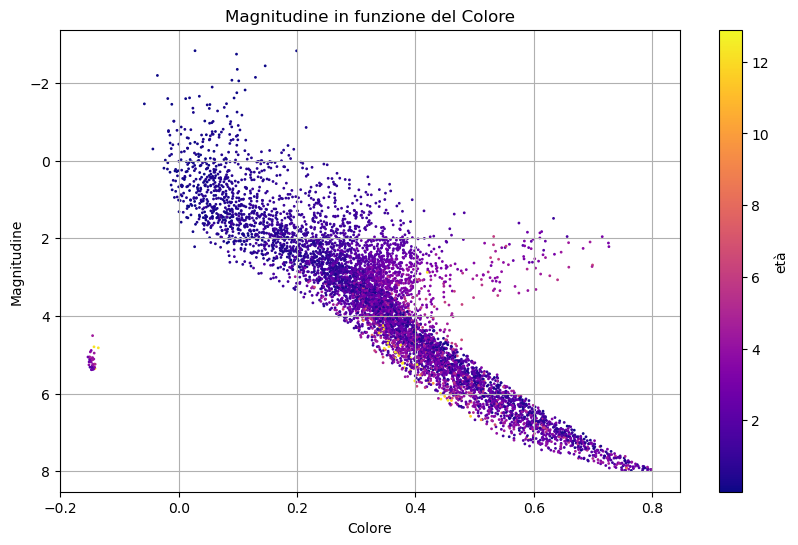

In [7]:
# fai grafico magnitudine in funzione del colore 
import numpy as np
import matplotlib.pyplot as plt
filename='Nemo_6670.dat' 

class MagnitudeColorPlot:
    def __init__(self, colors, magnitudes, ages):
        self.colors = colors
        self.magnitudes = magnitudes
        self.ages = ages 
    def plot(self):
        plt.figure(figsize=(10, 6))
        grafico=plt.scatter(self.colors, self.magnitudes, c=self.ages, cmap= 'plasma', s=1)
        plt.colorbar(grafico, label='età')
        plt.title('Magnitudine in funzione del Colore')
        plt.xlabel('Colore')
        plt.ylabel('Magnitudine')
        plt.grid(True)
        plt.gca().invert_yaxis()
        plt.show()

data = np.loadtxt(filename, skiprows=1, usecols=(4,8,12), unpack=True)
magnitudine = data[0]  # Prima colonna
età= data[2]
colore= data[1]  # Seconda colonna
M_ass=np.array(data[0])
by=np.array(data[1])
age_parent=np.array(data[2])
stelle = MagnitudeColorPlot(by, M_ass, age_parent)
stelle.plot()

/tmp/ipykernel_14791/275340782.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10',10)


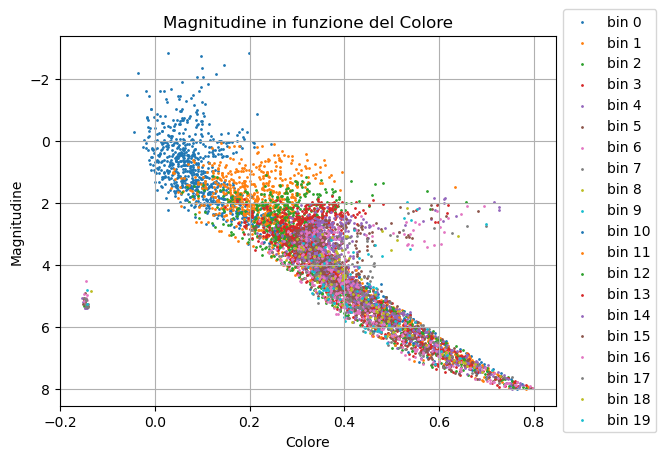

In [26]:
# fai grafico magnitudine in funzione del colore 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
file=pd.read_csv('Nemo_6670.dat', delimiter=' ')  

class MagnitudeColorPlot:
    def __init__(self, colors, magnitudes, ages):
        self.colors = colors
        self.magnitudes = magnitudes
        self.ages= ages 
    def plot(self):
        bins = pd.cut(self.ages, bins=20)
        cmap=plt.cm.get_cmap('tab10',10)
        fig, ax1 = plt.subplots() # Serve per replottare
        # Loop attraverso i gruppi basati sui bins
        for i in range(len(bins.categories)):
            # Seleziona i dati del bin attuale
            mask = (bins.codes == i)
            group_colors = self.colors[mask]
            group_magnitudes = self.magnitudes[mask]

            color = cmap(i % 10)  # Usa un colore dalla mappa
            ax1.scatter(group_colors, group_magnitudes, s=1, color=color, label=f'bin {i}')
        plt.gca().invert_yaxis()
        plt.title('Magnitudine in funzione del Colore')
        plt.xlabel('Colore')
        plt.ylabel('Magnitudine')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.grid(True)

filename='Nemo_6670.dat'
data = np.loadtxt(filename, skiprows=1, usecols=(4,8,12), unpack=True)
magnitudine = data[0]  # Prima colonna
età= data[2]
colore= data[1]  # Seconda colonna
M_ass=np.array(data[0])
by=np.array(data[1])
age_parent=np.array(data[2])
stelle = MagnitudeColorPlot(by, M_ass, age_parent)
stelle.plot()